# Renewable Potentials
###### Renewable potentials should be computed for solar PV, onshore wind and, where applicable, offshore wind. The preparation consists of two main components.
First, perform a land eligibility analysis like in previous assignments based on the criteria listed in the table below. Make your own judgement about which land cover classes would be suitable.
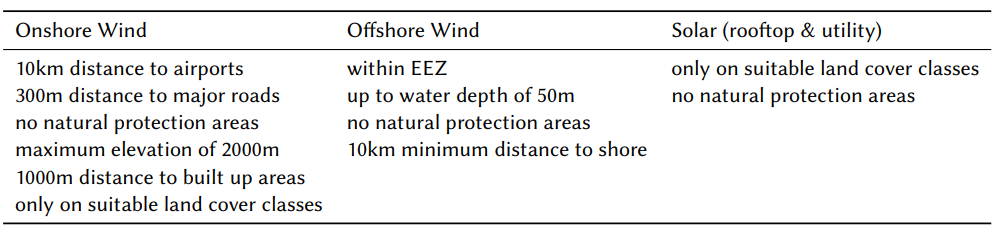


#### Shapes: Splitting Maharashtra into 6 regions

In [1]:
import rasterio as rst
import atlite
import geopandas as gpd
from matplotlib import pyplot as plt
import cartopy as crs
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability
from rasterio.plot import show 
import  pandas  as  pd 
import  numpy  as  np 
import  xarray  as  xr 
import  os 
import fiona

In [7]:
aa = gpd.read_file('https://tubcloud.tu-berlin.de/apps/files/?dir=/Data%20Science%20for%20ESM/Code%20file/Test%20shape%20file&fileid=3498389506')

HTTPError: HTTP Error 401: Unauthorized

In [2]:
# Load GeoDataFrame Level two for Maharashtra region, India
df = gpd.read_file("gadm41_IND_2.json")
df

gdf = df[df["NAME_1"]=="Maharashtra"]
gdf.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
347,IND.20.1_1,IND,India,IND.20_1,Maharashtra,NA,Ahmadnagar,Ahmadnagar,NA,District,District,NA,IN.MH.AH,"MULTIPOLYGON (((74.96300 18.82200, 74.97100 18..."
348,IND.20.2_1,IND,India,IND.20_1,Maharashtra,NA,Akola,NA,NA,District,District,NA,IN.MH.AK,"MULTIPOLYGON (((77.01970 20.44520, 77.01720 20..."
349,IND.20.3_1,IND,India,IND.20_1,Maharashtra,NA,Amravati,"Amaravati,Amraoti,Amaraoti",NA,District,District,NA,IN.MH.AM,"MULTIPOLYGON (((77.61570 20.78130, 77.60890 20..."
350,IND.20.4_1,IND,India,IND.20_1,Maharashtra,NA,Aurangabad,NA,NA,District,District,NA,IN.MH.AU,"MULTIPOLYGON (((75.21130 19.57250, 75.20930 19..."
351,IND.20.5_1,IND,India,IND.20_1,Maharashtra,NA,Bhandara,NA,NA,District,District,NA,IN.MH.BH,"MULTIPOLYGON (((79.84260 21.22670, 79.84650 21..."


In [3]:
# Create dictionary mapping each district to six divisions
division_dict = {'Ahmadnagar': 'Nashik',
    'Akola':'Amravati',
 'Amravati':'Amravati',
 'Aurangabad':'Aurangabad',
 'Bhandara':'Nagpur',
 'Bid':'Aurangabad',
 'Buldana': 'Amravati',
 'Chandrapur':'Nagpur',
 'Dhule':'Nashik',
 'Garhchiroli':'Nagpur',
 'Gondiya':'Nagpur',
 'Hingoli':'Aurangabad',
 'Jalgaon':'Nashik',
 'Jalna':'Aurangabad',
 'Kolhapur':'Pune',
 'Latur':'Aurangabad',
 'MumbaiCity':'Konkan',
 'MumbaiSuburban':'Konkan',
 'Nagpur':'Nagpur',
 'Nanded':'Aurangabad',
 'Nandurbar':'Nashik',
 'Nashik':'Nashik',
 'Osmanabad':'Aurangabad',
 'Palghar':'Konkan',
 'Parbhani':'Aurangabad',
 'Pune':'Pune',
 'Raigarh':'Konkan',
 'Ratnagiri':'Konkan',
 'Sangli':'Pune',
 'Satara':'Pune',
 'Sindhudurg':'Konkan',
 'Solapur':'Pune',
 'Thane':'Konkan',
 'Wardha':'Nagpur',
 'Washim':'Amravati',
 'Yavatmal':'Amravati'
}

gdf['division'] = df['NAME_2'].map(division_dict)
gdf.head()


C:\Users\Admin1\anaconda3\envs\esm\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,division
347,IND.20.1_1,IND,India,IND.20_1,Maharashtra,NA,Ahmadnagar,Ahmadnagar,NA,District,District,NA,IN.MH.AH,"MULTIPOLYGON (((74.96300 18.82200, 74.97100 18...",Nashik
348,IND.20.2_1,IND,India,IND.20_1,Maharashtra,NA,Akola,NA,NA,District,District,NA,IN.MH.AK,"MULTIPOLYGON (((77.01970 20.44520, 77.01720 20...",Amravati
349,IND.20.3_1,IND,India,IND.20_1,Maharashtra,NA,Amravati,"Amaravati,Amraoti,Amaraoti",NA,District,District,NA,IN.MH.AM,"MULTIPOLYGON (((77.61570 20.78130, 77.60890 20...",Amravati
350,IND.20.4_1,IND,India,IND.20_1,Maharashtra,NA,Aurangabad,NA,NA,District,District,NA,IN.MH.AU,"MULTIPOLYGON (((75.21130 19.57250, 75.20930 19...",Aurangabad
351,IND.20.5_1,IND,India,IND.20_1,Maharashtra,NA,Bhandara,NA,NA,District,District,NA,IN.MH.BH,"MULTIPOLYGON (((79.84260 21.22670, 79.84650 21...",Nagpur


,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,division
347,IND.20.1_1,IND,India,IND.20_1,Maharashtra,NA,Ahmadnagar,Ahmadnagar,NA,District,District,NA,IN.MH.AH,"MULTIPOLYGON (((74.96300 18.82200, 74.97100 18...",Nashik
348,IND.20.2_1,IND,India,IND.20_1,Maharashtra,NA,Akola,NA,NA,District,District,NA,IN.MH.AK,"MULTIPOLYGON (((77.01970 20.44520, 77.01720 20...",Amravati
349,IND.20.3_1,IND,India,IND.20_1,Maharashtra,NA,Amravati,"Amaravati,Amraoti,Amaraoti",NA,District,District,NA,IN.MH.AM,"MULTIPOLYGON (((77.61570 20.78130, 77.60890 20...",Amravati
350,IND.20.4_1,IND,India,IND.20_1,Maharashtra,NA,Aurangabad,NA,NA,District,District,NA,IN.MH.AU,"MULTIPOLYGON (((75.21130 19.57250, 75.20930 19...",Aurangabad
351,IND.20.5_1,IND,India,IND.20_1,Maharashtra,NA,Bhandara,NA,NA,District,District,NA,IN.MH.BH,"MULTIPOLYGON (((79.84260 21.22670, 79.84650 21...",Nagpur


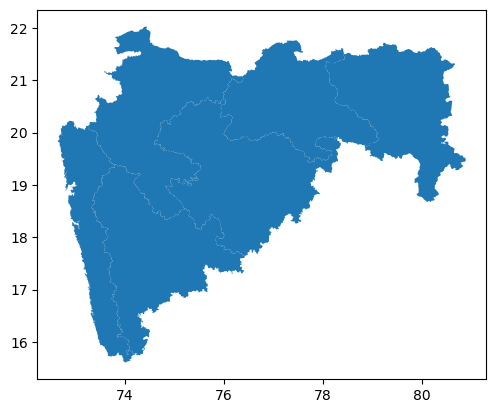

In [4]:
# Merging thirty- siX(36) districts into the six divisions

maha = gdf.dissolve(by='division').geometry

#Plot
maha.plot()
gdf.head()


##### Land Avialability

In [5]:
def  plot_area ( masked ,  transform ,  shape ): 
    fig ,  ax  =  plt . subplots ( figsize = ( 8 , 5 )) 
    ax  =  show ( masked ,  transform = transform ,  cmap = 'Greens' ,  vmin = 0 ,  ax = ax ) 
    shape . plot ( ax = ax , edgecolor = 'k' ,  color = 'None' ,  linewidth = 1 )

In [6]:
excluder  =  ExclusionContainer ( crs = 3035 ,  res = 300 ) 
excluder . add_geometry ( "ne_10m_roads.gpkg" ,  buffer = 500 ) 
masked , transform  =  shape_availability (maha.to_crs(3035).geometry ,  excluder)
plot_area ( masked ,  transform ,  maha.to_crs(3035).geometry )

DriverError: ne_10m_roads.gpkg: No such file or directory

In [ ]:
excluder . add_geometry ( "ne_10m_airports.gpkg" ,  buffer = 10000 ) 
masked , transform  =  shape_availability (maha.to_crs(3035).geometry ,  excluder)
plot_area ( masked ,  transform ,  maha.to_crs(3035).geometry )

In [ ]:
excluder . add_geometry ( "eez_boundaries_v11.gpkg" ,  buffer = 10000 ) 
masked , transform  =  shape_availability (maha.to_crs(3035).geometry ,  excluder)
plot_area ( masked ,  transform ,  maha.to_crs(3035).geometry )

excluder  =  ExclusionContainer ( crs = 3035 ,  res = 300 ) 
excluder . add_geometry ( "eez_v11.gpkg" ,  buffer = 50 ) 
masked , transform  =  shape_availability (maha.to_crs(3035).geometry ,  excluder)
plot_area ( masked ,  transform ,  maha.to_crs(3035).geometry )

In [ ]:
fn  =  ('PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-IN.tif')
excluder . add_raster ( fn ,  codes =[ 50 ],  buffer = 1000 ,  crs = 4326 ) 
excluder . add_raster ( fn ,  codes = [ 20 , 30 , 50,40 , 60 ],  crs = 4326 ,  invert = True ) 
masked , transform  =  shape_availability (maha.to_crs(3035).geometry ,  excluder)
plot_area ( masked ,  transform ,  maha.to_crs(3035).geometry )

In [ ]:
fn  =  ('WDPA_Oct2022_Public_shp-IND.tif') 
excluder . add_raster ( fn ,  crs = 3035 ) 
#excluder . add_raster ( fn ,  codes = [1],  crs = 3035 ,  invert = True )
masked , transform  =  shape_availability (maha.to_crs(3035).geometry ,  excluder)
#masked.sum()
plot_area ( masked ,  transform ,  maha.to_crs(3035).geometry )

In [ ]:
excluder.add_raster('GEBCO_2022_TID.nc', buffer=10000, crs=4326)
masked , transform  =  shape_availability (maha.to_crs(3035).geometry ,  excluder)
plot_area ( masked ,  transform ,  maha.to_crs(3035).geometry )
#masked.sum()

excluder . add_geometry ( "ne_10m_airports.gpkg" ,  buffer = 10000 ) 
excluder . add_geometry ( "eez_v11.gpkg" ,  buffer = 10000 ) 
fn  =  ('PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-IN.tif')
excluder . add_raster ( fn ,  codes =[ 50 ],  buffer = 1000 ,  crs = 4326 ) 
excluder . add_raster ( fn ,  codes = [ 20 , 30 , 40 , 60 ],  crs = 4326 ,  invert = True ) 
fn  =  ('WDPA_Oct2022_Public_shp-IND.tif') 
excluder . add_raster ( fn ,  crs = 3035 ) 
excluder . add_raster ( fn ,  codes = [1, 2, 3, 4, 5, 6],  crs = 4326 ,  invert = True )
excluder.add_raster('GEBCO_2022_TID.nc', buffer=10000, crs=4326)
excluder.add_geometry('eez_boundaries_v11.gpkg',invert=True)

##### translating solar and wind potentoial on the avavilable area

In [ ]:
minx, miny, maxx, maxy = maha.total_bounds
buffer = 0.25

In [ ]:
cutout = atlite.Cutout(
   path="Maharashtra_regions.nc",
   module="era5",
   x=slice(minx-buffer, maxx+buffer),
   y=slice(miny-buffer, maxy+buffer),
   time="2020",
)

In [ ]:
cutout.prepare()

In [ ]:
cutout.data

In [ ]:
cutout.prepared_features

Availability Matrix

In [ ]:
cutout = atlite.Cutout("Maharashtra_regions.nc")

In [ ]:
maha1=gpd.GeoDataFrame(maha_split[0], geometry=maha_split[0].geometry, crs=4326).set_index('NAME_2')
maha2=gpd.GeoDataFrame(maha_split[1],geometry= maha_split[1].geometry, crs=4326).set_index('NAME_2')
maha3=gpd.GeoDataFrame(maha_split[2],geometry= maha_split[2]. geometry, crs=4326).set_index('NAME_2')
maha4=gpd.GeoDataFrame(maha_split[3],geometry=  maha_split[3].geometry, crs=4326).set_index('NAME_2')
maha5=gpd.GeoDataFrame(maha_split[4],geometry=  maha_split[4].geometry, crs=4326).set_index('NAME_2')
maha6=gpd.GeoDataFrame(maha_split[5],geometry=  maha_split[5].geometry, crs=4326).set_index('NAME_2')
maha1

In [ ]:
def regional_profiles(df):
    A = cutout.availabilitymatrix(maha1.to_crs(3035), excluder)
    
    cap_per_sqkm = 3
    area = cutout.grid.set_index(['y', 'x']).to_crs(3035).area / 1e6
    area = xr.DataArray(area, dims=('spatial'))
    capacity_matrix = A.stack(spatial=['y', 'x']) * area * cap_per_sqkm
    
    
    solar = cutout.pv(
    panel=atlite.solarpanels.CdTe,
    matrix=capacity_matrix,
    orientation='latitude_optimal',
    index=df.index,
    per_unit=True,
    )
    
    
    ## onshore wind profile
    onwind = cutout.wind(
    atlite.windturbines.Vestas_V112_3MW,
    matrix=capacity_matrix,
    index=df.index,
    per_unit=True,
    )
    
    
    ## offshore wind profile
    offwind= cutout.wind(
       atlite.windturbines.NREL_ReferenceTurbine_5MW_offshore,
       matrix=capacity_matrix,
       index=df.index,
       per_unit=True,
       )
    return solar, onwind, offwind

In [ ]:
cutout

Solar Profile

In [ ]:
import cartopy
import cartopy.crs as ccrs

In [ ]:
solar_rad = cutout.data.influx_diffuse.mean(dim='time')


In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

solar_rad.plot(ax=ax, vmin=0, vmax=10)

maha.to_crs(4326).plot(ax=ax, edgecolor='k', color='none')

In [ ]:
solar.to_pandas().resample('D').mean().plot()

#### ONWind Profiles

In [ ]:
onwind = cutout.wind(
    atlite.windturbines.Vestas_V112_3MW,
    matrix=capacity_matrix,
    index=maha.index,
    per_unit=True,
)

In [ ]:
onwind.to_pandas()

In [ ]:
onwind.to_pandas().iloc[:,0].plot()

In [ ]:
wind100m = cutout.data.wnd100m.mean(dim='time')


In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())

wind100m.plot(ax=ax, vmin=0, vmax=10)

maha.to_crs(4326).plot(ax=ax, edgecolor='k', color='none')

#### Offwind profile

In [ ]:
offwind= cutout.wind(
       atlite.windturbines.NREL_ReferenceTurbine_5MW_offshore,
       matrix=capacity_matrix,
       index=maha.index,
       per_unit=True,
)

In [ ]:
offwind.to_pandas().head()

In [ ]:
offwind.to_pandas().iloc[:,0].plot(legend=True)